In [ ]:
'''
1. DT, SVM, SVDD, LogisticR 모델을 사용해 타이타닉 분석
2. 결과물 한 눈에 볼 수 있도록
3.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽기
train = pd.read_csv('Assignment_0809/input/train.csv')
test = pd.read_csv('Assignment_0809/input/test.csv')



In [21]:
# 데이터 파악
'''
# 총 891명, 생존률 38.3%
       PassengerId    Survived     ...           Parch        Fare
count   891.000000  891.000000     ...      891.000000  891.000000
mean    446.000000    0.383838     ...        0.381594   32.204208
std     257.353842    0.486592     ...        0.806057   49.693429
'''
print(train.describe())

print(train.head())
print(test.head()) # Survived 컬럼이 없음 (label이 없음)



       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1        

In [9]:
# 결측값 현황 파악

print(train.isnull().sum()) # Age: 177, Cabin : 687, Embarked : 2
print(test.isnull().sum()) # Age : 86, Fare : 1, Cabin : 327



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
# 선실 등급별 파악
'''
# 선실 등급이 높을 수록, 생존률이 높음
        PassengerId  Survived    ...         Parch       Fare
Pclass                           ...                         
1        461.597222  0.629630    ...      0.356481  84.154687
2        445.956522  0.472826    ...      0.380435  20.662183
3        439.154786  0.242363    ...      0.393075  13.675550
'''
print(train.groupby('Pclass').mean())


        PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550


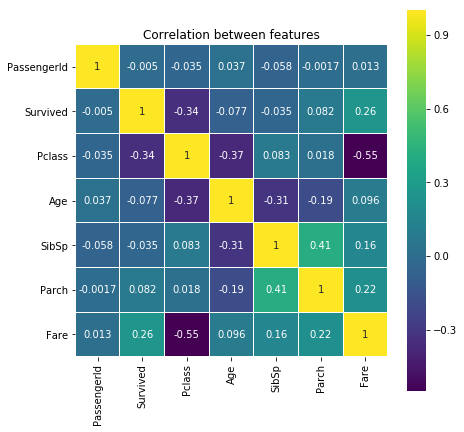

In [18]:

# 상관관계 분석
'''
수치가 0 에 가까울수록, 상관관계가 낮다
Pclass : 0.34
Fare : 0.26
이 두 독립변수가 Survived와 상관관계가 높다.

Pclass - Fare : 0.55의 가장 큰 상관관계를 가짐(종속성을 나타내므로 제거해보자)
SibSp - Parch : 0.41 가족 관계이므로 당연히 큼
SibSp와 Parch - Fare : 0.16, 0.22로 티켓을 같이 사서 높게 책정됐다고 생각됨

'''
plt.figure(figsize=(7, 7))
sns.heatmap(train.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()


In [ ]:

# 전처리를 위해 데이터 합침. (List)
train_test_data = [train, test]


In [ ]:

# Name 컬럼 전처리

# 1. 이름에서 '.' 앞에있는 단어 하나(title)를 추출한다.
'''
(titles) 
(of a man): Mr (Mister, mister), Sir (sir); 
(of a woman): Ms (Miz, mizz), Mrs (Mistress, mistress), Miss (miss), Dame (dame), 
(of a non-binary person): Mx (Mixter); 
(see also): Dr (Doctor, doctor), Madam (madam, ma'am)
'''
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

train['Title'].value_counts()
test['Title'].value_counts()
